In [100]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os 
import subprocess
import ipywidgets as widgets
from ipywidgets import interact, interactive, Layout, IntSlider ,FloatSlider
import glob
import re
import cv2

In [101]:
def load_file_content(file_name):
    freq = np.loadtxt(file_name)[:,0]
    transmittance = np.loadtxt(file_name)[:,1]
    return freq, transmittance


In [102]:
def modify_amc_file(file_name, pwv):
    MYFILE=file_name
    lines = open(MYFILE, 'r').readlines()
    new_last_line = (f'column h2o {pwv} mm_pwv')
    lines[-1] = new_last_line
    open(MYFILE, 'w').writelines(lines)


In [103]:
def create_output_file(input_file,output_file):
    path = r"Transmittance_Files" + "\\" + output_file

    subprocess.run(['am', input_file,'>',os.path.normpath(path)],shell=True)

In [104]:
pwv = 0.0
input_file = 'example2.1.amc'

for i in range(0,500):
    pwv = round(i*0.01,2)
    modify_amc_file(input_file,pwv)
    create_output_file(input_file,f'pwv_{pwv}.txt')

In [123]:
files=glob.glob("Transmittance_Files\*.txt")

for file in files:

    freq, transmittance = load_file_content(file)
    pwv = float(file[24:].replace('.txt',''))
    plt.figure(figsize=(25,10))
    plt.style.use('seaborn-ticks')
    plt.plot(freq,transmittance,color = 'blue',)
    plt.xlabel("Frequency (GHz)",fontsize=15)
    plt.ylabel("Transmittance",fontsize=15)
    if(len(str(pwv).rsplit('.')[-1])==2):
        plt.title(f'Transmittance AM : PWV = {pwv} mm',fontsize=20,fontweight='bold')
    if(len(str(pwv).rsplit('.')[-1])==1):
        plt.title(f'Transmittance AM : PWV = {pwv}0 mm',fontsize=20,fontweight='bold')
    plt.xticks(np.arange(0,2500,200))
    plt.yticks(np.arange(0,1.1,0.1))
    plt.xlim(0,2500)
    plt.ylim(0,1.1)
    plt.grid()
    plt.savefig('Transmittance_Files\pwv_{pwv}.jpeg'.format(pwv=pwv))
    plt.close()

In [125]:

#fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#video = cv2.VideoWriter('Transmittance_Files\pwv_video.mp4',fourcc,20,(1000,1000))

files = glob.glob("Transmittance_Files\*.jpeg")

img_arr = []
   
for file in files:
    img = cv2.imread(file)
    height,width, layers = img.shape
    size = (width,height)
    img_arr.append(img)

out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 2, size)

for i in range(len(img_arr)):
    out.write(img_arr[i])
out.release()

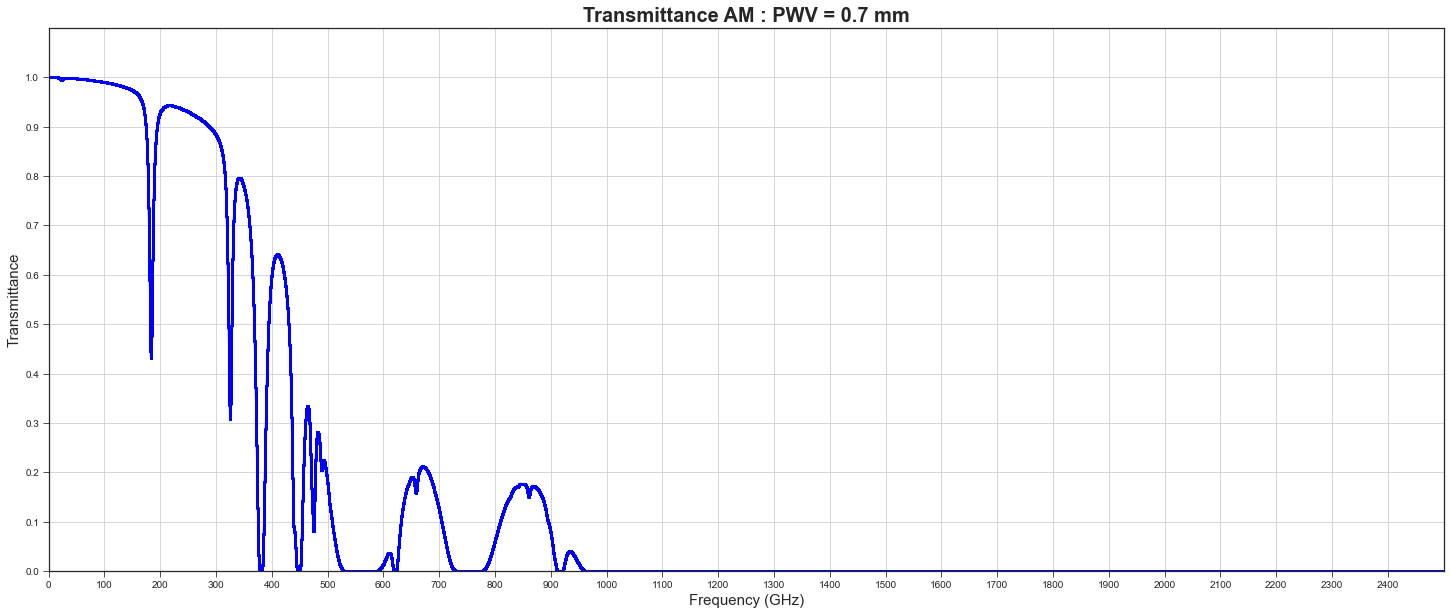

In [111]:
freq, transmittance = load_file_content('example2.1.out')
#pwv = float(file[24:].replace('.txt',''))
pwv = 0.7
plt.figure(figsize=(25,10))
plt.style.use('seaborn-ticks')
plt.plot(freq,transmittance,color = 'blue',marker='o',markersize=1)
plt.xlabel("Frequency (GHz)",fontsize=15)
plt.ylabel("Transmittance",fontsize=15)
plt.title(f"Transmittance AM : PWV = {pwv} mm",fontsize=20,fontweight='bold')
plt.xticks(np.arange(0,2500,100))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlim(0,2500)
plt.ylim(0,1.1)
plt.grid()
plt.show()

In [122]:
cost = '34.2'
if len(cost.rsplit('.')[-1]) == 2:
   print('2 digits after decimal point')